In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
import PIL.Image as pil

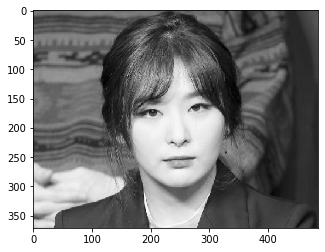

In [23]:
img = pil.open("data.jpg").convert("L")
data=np.array (img)
k,l=data.shape
total=k*l
sc=int(l/2)
sk=int(k/2)
plt.imshow (data, 'gray')

# WAVELET 

In [24]:
low1 = [0.7,0.7]
high1 = [-0.7,0.7]

In [25]:
def padding (data,bnyk):
    pad1=np.pad(data,(0,bnyk),'constant')
    return pad1

In [26]:
def mencarih0(pad, kernel):
    zeros = np.zeros([k,l], dtype=np.int)
    for v in range (len(zeros)):
        for w in range (len(zeros)):
            for i in range(len(kernel)):
                zeros[v][w] += int ((kernel[i]*pad[v][w+i]))
    return zeros

In [27]:
def seleckl (data):
    tmp=np.zeros((k,sc),dtype=np.int)
    for v in range (k):
        for w in range (sc):
            tmp[v,w]=int(data[v,w*2])
    return tmp

In [28]:
def padbawah (data):
    pad2=np.pad(data,(0,2),'constant')
    return pad2

In [29]:
def transpos (kernel):
    zh=np.zeros((len(kernel),1))
    for i in range (len(kernel)):
        for j in range (1):
            zh[i][j]=kernel[i]
    return zh

In [30]:
def mencarih1(kernel,pad):
    tmp1=np.zeros((k,sc), dtype=np.int)
    for v in range (k):
        for w in range (sc):
            for j in range(len(kernel)):
                tmp1[v][w] +=int((kernel[j]*pad[j+v][w]))
    return tmp1

In [31]:
def selecbr(data):
    tmp2=np.zeros((sk,sc), dtype=np.int)
    for v in range (sk):
        for w in range (sc):
            tmp2[v,w]=int(data[v*2,w])
    return tmp2

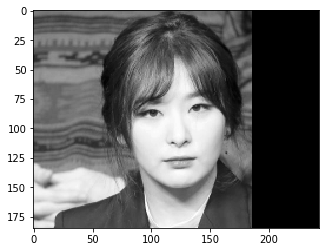

In [34]:
pad=padding(data,1)
kv0=(mencarih0(pad, low1))
pad_bw=seleckl(kv0)
pad2=padding(pad_bw,1)
dataa=mencarih1(low1,pad2)
LL=selecbr(dataa)
plt.imshow (LL,'gray')

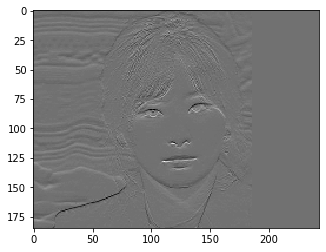

In [35]:
pad=padding(data,1)
kv0=(mencarih0(pad, low1))
pad_bw=seleckl(kv0)
pad2=padding(pad_bw,1)
dataa=mencarih1(high1,pad2)
LH=selecbr(dataa)
plt.imshow (LH,'gray')

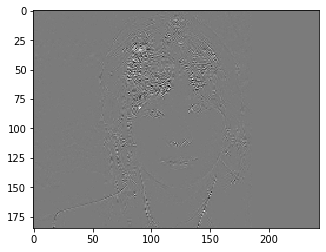

In [36]:
pad=padding(data,1)
kv0=(mencarih0(pad, high1))
pad_bw=seleckl(kv0)
pad2=padding(pad_bw,1)
dataa=mencarih1(high1,pad2)
HH=selecbr(dataa)
plt.imshow (HH,'gray')

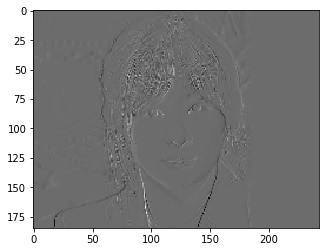

In [37]:
pad=padding(data,1)
kv0=(mencarih0(pad, high1))
pad_bw=seleckl(kv0)
pad2=padding(pad_bw,1)
dataa=mencarih1(low1,pad2)
HL=selecbr(dataa)
plt.imshow (HL,'gray')

# WAVELET FITUR

In [38]:
def mean (data):
    rataPW=np.sum(data)/total
    return rataPW

In [39]:
def variance (data, meanW):
    data=(data-meanW)**2
    var=np.sum (data)/(total-1)
    return var

In [40]:
def std (varW):
    std = math.sqrt(varW)
    return std

In [45]:
meanLL=mean (LL)
varLL=variance(LL,meanLL)
stdLL=std (varLL)

meanHL=mean (HL)
varHL=variance(HL,meanHL)
stdHL=std (varHL)

meanLH=mean (LH)
varLH=variance(LH,meanLH)
stdLH=std (varLH)

meanHH=mean (HH)
varHH=variance(HH,meanHH)
stdHH=std (varHH)

print ("Data mean LL = ",meanLL,"Data variance LL = ",varLL,"Data standar deviasi LL = ",stdLL)
print ("Data mean HL = ",meanHL,"Data variance HL = ",varHL,"Data standar deviasi HL = ",stdHL)
print ("Data mean LH = ",meanLH,"Data variance LH = ",varLH,"Data standar deviasi LH = ",stdLH)
print ("Data mean HH = ",meanHH,"Data variance HH = ",varHH,"Data standar deviasi HH = ",stdHH)

Data mean LL =  44.08884341064635 Data variance LL =  9675.937791839904 Data standar deviasi LL =  98.36634481284696
Data mean HL =  -0.018640533315585725 Data variance HL =  18.614410686479182 Data standar deviasi HL =  4.314442106052552
Data mean LH =  0.0035550674963672865 Data variance LH =  10.523385433390407 Data standar deviasi LH =  3.2439767929796304
Data mean HH =  0.0018690448459840494 Data variance HH =  3.844596086111659 Data standar deviasi HH =  1.960764158717631


# HISTOGRAM 

In [52]:
derajat_keabuan = []
for i in range(256):
    derajat_keabuan.append(i)

In [46]:
def probda (sampling):
    prob=np.zeros(256)
    for i in range(k):
        for j in range(l):
            prob[sampling[i,j]] += 1
    return (prob)
prob=probda(data)

In [47]:
def probak (data):
    for i in range(256):
        data [i]/=total
    return (data)
probHasil=probak(prob)

<BarContainer object of 256 artists>

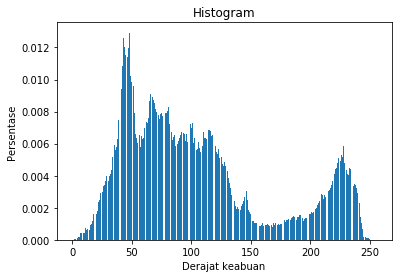

In [54]:
plt.xlabel('Derajat keabuan')
plt.ylabel('Persentase')
plt.title('Histogram')
plt.bar (derajat_keabuan,probHasil )

# FITUR HISTOGRAM

In [48]:
def hitungmean (data):
    matriks=0
    for i in range(k):
        for j in range(l):
            matriks += data[i,j]
    rata=matriks/total
    return rata
mean=hitungmean (data)

In [49]:
def fitur (m1,prob):
    std=0
    mean_sq=0
    var=0
    skew=0
    kur=0
    for i in range (256):
        std += abs (i - m1) * prob[i]
        mean_sq+= pow(i, 2) * prob[i]
        var += pow(i - m1, 2) * prob[i]
        skew += pow(i - m1, 3) * prob[i]
        kur += pow(i - m1, 4) * prob[i]-3
    return (std,mean_sq,var,skew,kur)

In [50]:
print (mean)
fitur (mean, probHasil)

104.79315164220824


(50.016141470130485,
 14823.429569731456,
 3841.8249386246025,
 196267.25720990193,
 38139652.465733595)